<a href="https://colab.research.google.com/github/Inamulhaq18/Airbnb-Istanbul/blob/main/Airbnbistanbul_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Airbnb Istanbul Dataset, to answer invertors business questions 
1.How are the listing spread across different neighborhood ?

2.How do the pricing vary across neighborhoods?

3.Does filling the property  with lots of amenities help in increasing the   price of the property ?

4.What are the top 25 type of property available in Istanbul ?

Importing data stored in drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/Airbnbistanbul/listings.csv

gdrive/MyDrive/Airbnbistanbul/listings.csv



### Importing Libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [ ]:
dflisting=pd.read_csv('gdrive/MyDrive/Airbnbistanbul/listings.csv')

# **Exploratory Data Analysis**

In [ ]:
dflisting.shape

(24235, 74)

In [ ]:
dflisting.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed' Are columns that desribe the listing's nieghbourhood

In [ ]:
dflisting[['id','name']]

,id,name
0,20815,The Bosphorus from The Comfy Hill
1,27831,"Large, clean, spacious apartment"
2,28277,Duplex Apartment 11 with Terrace
3,28318,Cosy home overlooking Bosphorus
4,29241,"↪ Istanbul, Your second house"
...,...,...
24230,51151939,Frame King Room with Balcony
24231,51152217,Frame Apart
24232,51156519,Bosphorus View Garden Terrace in Perfect Area
24233,51158888,no 1


### Making a filtered verision of the dataset for better and ease in handling dataset 

In [ ]:
listing_filterdf = dflisting[['id','name','neighbourhood_cleansed','latitude','longitude','property_type', 'room_type', 'amenities', 'price']]

In [ ]:
listing_filterdf

,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price
0,20815,The Bosphorus from The Comfy Hill,Besiktas,41.069760,29.043790,Entire rental unit,Entire home/apt,"[""Host greets you"", ""TV with standard cable"", ...","$1,028.00"
1,27831,"Large, clean, spacious apartment",Sisli,41.067770,29.003370,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""TV with standard cable""...",$768.00
2,28277,Duplex Apartment 11 with Terrace,Sisli,41.046720,28.984020,Entire serviced apartment,Entire home/apt,"[""Hot water"", ""Fire extinguisher"", ""TV"", ""Bath...",$596.00
3,28318,Cosy home overlooking Bosphorus,Sariyer,41.091040,29.055800,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""TV with standard cable""...","$1,072.00"
4,29241,"↪ Istanbul, Your second house",Beyoglu,41.048030,28.952270,Private room in rental unit,Private room,"[""Breakfast"", ""TV"", ""Washer"", ""Wifi"", ""Shampoo...",$429.00
...,...,...,...,...,...,...,...,...,...
24230,51151939,Frame King Room with Balcony,Beyoglu,41.028097,28.973408,Entire rental unit,Entire home/apt,"[""TV"", ""Washer"", ""Wifi"", ""Heating"", ""Air condi...",$218.00
24231,51152217,Frame Apart,Beyoglu,41.028134,28.973256,Entire apartment,Entire home/apt,"[""Hot water"", ""TV"", ""Washer"", ""Wifi"", ""Heating...",$197.00
24232,51156519,Bosphorus View Garden Terrace in Perfect Area,Besiktas,41.041832,29.008368,Entire rental unit,Entire home/apt,"[""Heating"", ""Shampoo"", ""Window AC unit"", ""Pack...",$545.00
24233,51158888,no 1,Beyoglu,41.038915,28.981979,Room in hotel,Private room,"[""Hot water"", ""TV"", ""Lock on bedroom door"", ""B...",$455.00


# 1. How are the listing spread across different neighborhood ?

checking for the right column to work-on to answer the question.

Checking for null values

In [ ]:
np.sum(dflisting.neighbourhood_group_cleansed.isnull())

24235

Neighbourhood_cleansed looks like the only usefull columns for learning abour neighbourhood 

In [ ]:
np.sum(dflisting.neighbourhood_cleansed.isnull)

<bound method Series.isnull of 0        Besiktas
1           Sisli
2           Sisli
3         Sariyer
4         Beyoglu
           ...   
24230     Beyoglu
24231     Beyoglu
24232    Besiktas
24233     Beyoglu
24234     Beyoglu
Name: neighbourhood_cleansed, Length: 24235, dtype: object>

In [ ]:
dflisting.neighbourhood_cleansed.unique()

array(['Besiktas', 'Sisli', 'Sariyer', 'Beyoglu', 'Uskudar', 'Fatih',
       'Kagithane', 'Kadikoy', 'Maltepe', 'Esenyurt', 'Basaksehir',
       'Bahcelievler', 'Adalar', 'Bagcilar', 'Eyup', 'Sile', 'Beykoz',
       'Cekmekoy', 'Kucukcekmece', 'Sancaktepe', 'Tuzla', 'Beylikduzu',
       'Atasehir', 'Kartal', 'Silivri', 'Bakirkoy', 'Gaziosmanpasa',
       'Zeytinburnu', 'Pendik', 'Umraniye', 'Catalca', 'Avcilar',
       'Gungoren', 'Buyukcekmece', 'Bayrampasa', 'Sultanbeyli', 'Esenler',
       'Sultangazi', 'Arnavutkoy'], dtype=object)

In [ ]:
len(dflisting.neighbourhood_cleansed.unique())

39

So, There are 39 neighbourhood in Istanbul

Comming to the question, now I need to count the number of IDs for each unique neighbourhood.

In [ ]:
listing_by_neigh=dflisting.groupby('neighbourhood_cleansed')['id'].count()
listing_by_neigh=listing_by_neigh.sort_values(ascending=False)

In [ ]:
listing_by_neigh

neighbourhood_cleansed
Beyoglu          6682
Fatih            3443
Sisli            3402
Kadikoy          2190
Besiktas         1615
Uskudar           706
Esenyurt          686
Kagithane         592
Atasehir          391
Maltepe           346
Bakirkoy          318
Sariyer           316
Bagcilar          253
Bahcelievler      249
Basaksehir        246
Umraniye          244
Avcilar           231
Eyup              225
Adalar            223
Pendik            202
Kartal            202
Sile              196
Kucukcekmece      196
Beylikduzu        118
Buyukcekmece      111
Zeytinburnu       111
Beykoz            110
Tuzla             100
Arnavutkoy         99
Gaziosmanpasa      75
Gungoren           63
Cekmekoy           56
Sancaktepe         53
Esenler            47
Silivri            43
Bayrampasa         30
Catalca            25
Sultangazi         21
Sultanbeyli        19
Name: id, dtype: int64

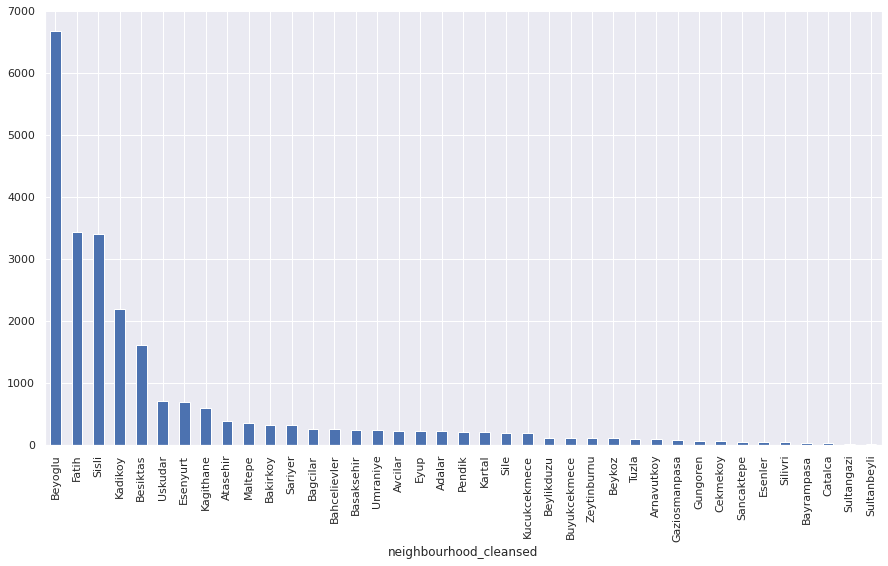

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
listing_by_neigh.plot(kind='bar')

# 2. How do the pricing vary across neighborhoods?

In [ ]:
len(dflisting.id.unique())

24235

In [ ]:
dflisting.price

0        $1,028.00
1          $768.00
2          $596.00
3        $1,072.00
4          $429.00
           ...    
24230      $218.00
24231      $197.00
24232      $545.00
24233      $455.00
24234    $1,010.00
Name: price, Length: 24235, dtype: object

Removing the "$" character from the column and also changing it to float type.

In [ ]:
listing_filterdf.price=listing_filterdf["price"].str.replace('[$, ]', '').astype(float)
once

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
avg_price_neigh=listing_filterdf.groupby('neighbourhood_cleansed')['price'].mean()
avg_price_neigh=avg_price_neigh.sort_values(ascending=False)

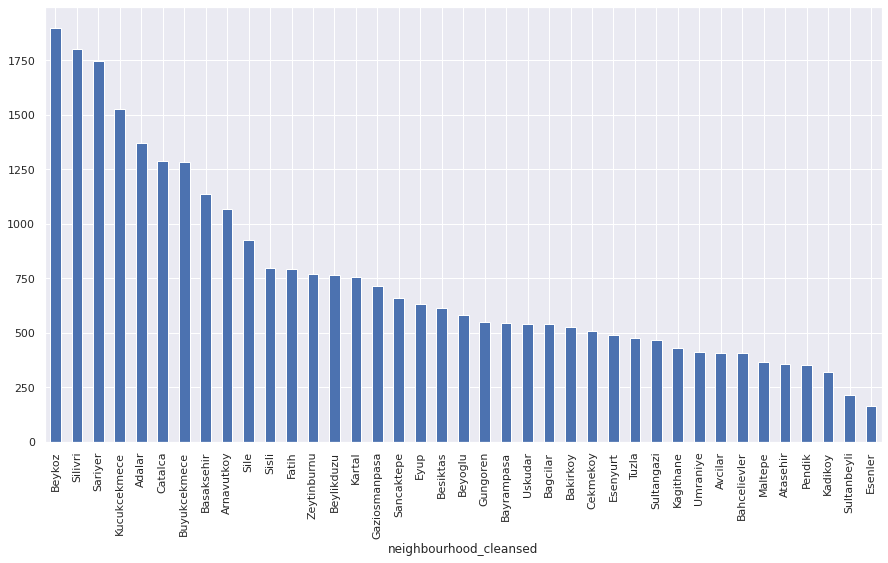

In [ ]:
avg_price_neigh.plot(kind='bar')

#3.Does filling the property  with lots of amenities help in increasing the price of the property ?


---



In [ ]:
listing_filterdf

,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price
0,20815,The Bosphorus from The Comfy Hill,Besiktas,41.069760,29.043790,Entire rental unit,Entire home/apt,"[""Host greets you"", ""TV with standard cable"", ...",1028.0
1,27831,"Large, clean, spacious apartment",Sisli,41.067770,29.003370,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""TV with standard cable""...",768.0
2,28277,Duplex Apartment 11 with Terrace,Sisli,41.046720,28.984020,Entire serviced apartment,Entire home/apt,"[""Hot water"", ""Fire extinguisher"", ""TV"", ""Bath...",596.0
3,28318,Cosy home overlooking Bosphorus,Sariyer,41.091040,29.055800,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""TV with standard cable""...",1072.0
4,29241,"↪ Istanbul, Your second house",Beyoglu,41.048030,28.952270,Private room in rental unit,Private room,"[""Breakfast"", ""TV"", ""Washer"", ""Wifi"", ""Shampoo...",429.0
...,...,...,...,...,...,...,...,...,...
24230,51151939,Frame King Room with Balcony,Beyoglu,41.028097,28.973408,Entire rental unit,Entire home/apt,"[""TV"", ""Washer"", ""Wifi"", ""Heating"", ""Air condi...",218.0
24231,51152217,Frame Apart,Beyoglu,41.028134,28.973256,Entire apartment,Entire home/apt,"[""Hot water"", ""TV"", ""Washer"", ""Wifi"", ""Heating...",197.0
24232,51156519,Bosphorus View Garden Terrace in Perfect Area,Besiktas,41.041832,29.008368,Entire rental unit,Entire home/apt,"[""Heating"", ""Shampoo"", ""Window AC unit"", ""Pack...",545.0
24233,51158888,no 1,Beyoglu,41.038915,28.981979,Room in hotel,Private room,"[""Hot water"", ""TV"", ""Lock on bedroom door"", ""B...",455.0


In [ ]:
amenities=listing_filterdf.amenities

In [ ]:
amenities[0]

'["Host greets you", "TV with standard cable", "Hangers", "Washer", "Heating", "Air conditioning", "Hair dryer", "Long term stays allowed", "Free parking on premises", "Shampoo", "Kitchen", "Cable TV", "Dedicated workspace", "Essentials", "Iron"]'

**Counting the numbers of amenities**

In [ ]:
amenities[0].count(",") + 1


15

In [ ]:
number_of_amenites=[]
for row in amenities:
  number_of_amenites.append(row.count(",") + 1)

In [ ]:
number_of_amenites[0]

15

In [ ]:
amenities= amenities.to_frame()

In [ ]:
amenities['size']=pd.DataFrame(number_of_amenites)

In [ ]:
amenities['price']=listing_filterdf['price']

In [ ]:
amenities.head()
amenities.size

72708

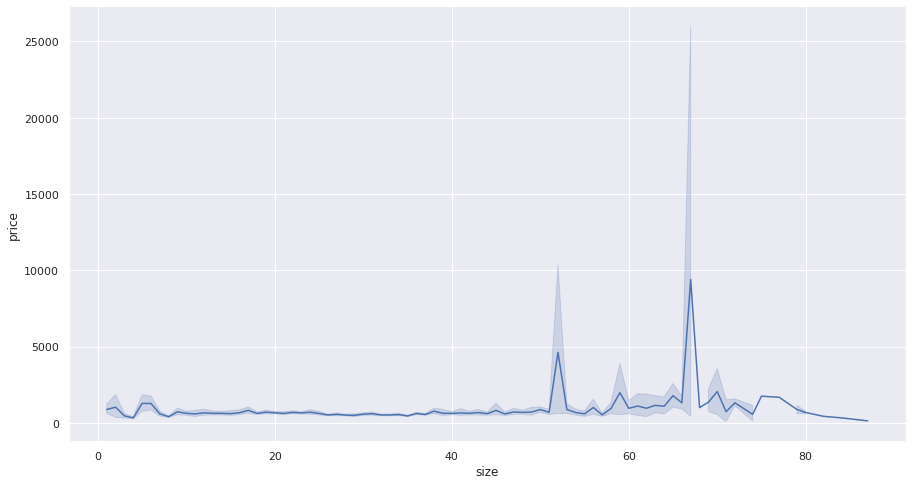

In [ ]:
ax = sns.lineplot(x=amenities['size'],y=amenities['price'])

# 4. What are the top 25 type of property available in Istanbul ?

In [ ]:
different_types_properties=listing_filterdf.groupby(listing_filterdf.property_type)['id'].count()

In [ ]:
print(len(different_types_properties))
different_types_properties

100


property_type
Entire rental unit             6414
Private room in rental unit    4399
Entire apartment               2165
Room in boutique hotel         1585
Entire serviced apartment      1549
                               ... 
Hut                               1
Room in casa particular           1
Shared room in chalet             1
Room in heritage hotel            1
Yurt                              1
Name: id, Length: 100, dtype: int64

There are 100 different types of property listing, we want the top 25.

In [ ]:
different_types_properties=different_types_properties.sort_values(ascending=False)

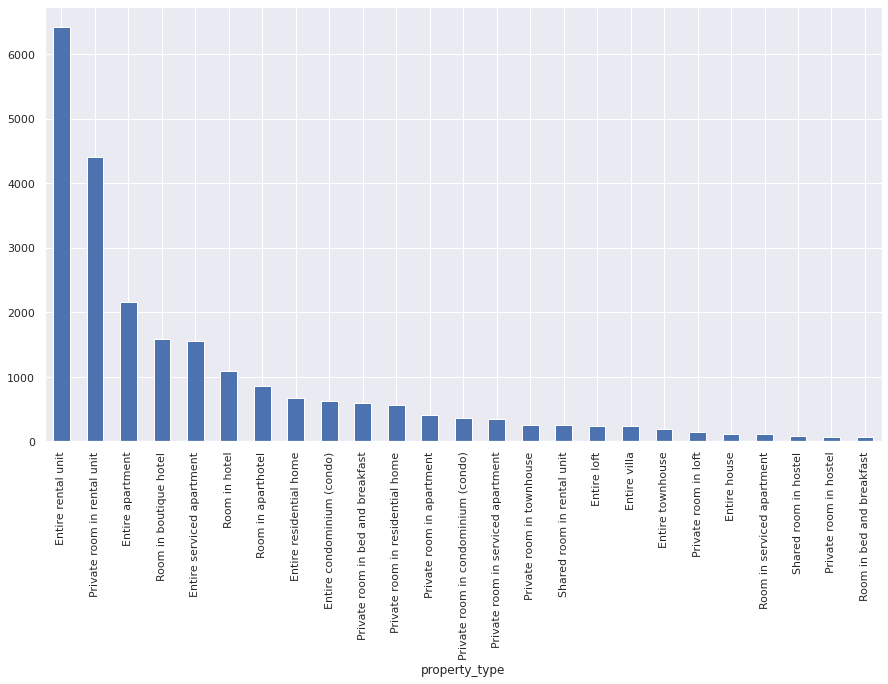

In [ ]:
different_types_properties.head(25).plot(kind='bar')

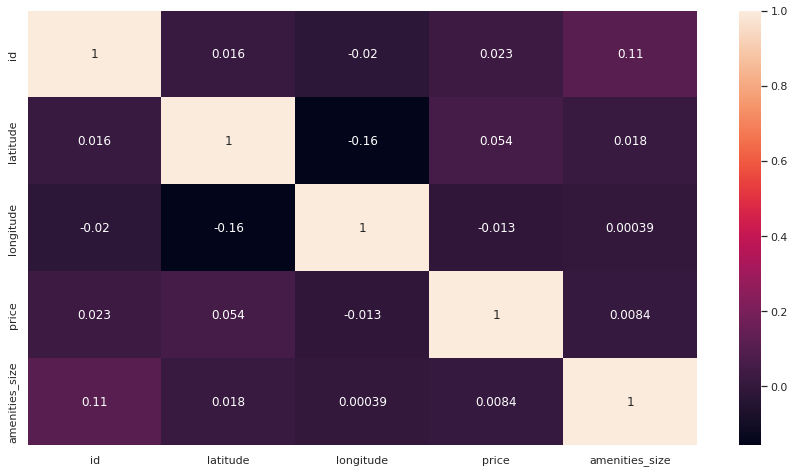

In [ ]:
corrMatrix = listing_filterdf.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()